# Porazdelitve in osamelci

Verjetnostna porazdelitev $P$ je funkcija nad naključno spremenljivko $X$, ki vsaki možni vrednosti spremenljivke priredi verjetnost - vrednost v intervalu $[0,1]$. Spremenljivka $X$ je lahko zvezna, diskretna, eno- ali več dimenzionalna. 

Vrednost $P(X)$ je za vsako možno vrednost spremenljivke $X$ (celotno definicijsko območje), vsota preko definicijskega območja pa mora biti enaka $1$.

Za vsako verjetnostno porazdelitev, ki jo bomo spoznali v nadaljevanju, navedemo:
* definicijsko območje (t.j. kakšna je spremnljivka $X$),
* obliko (formulo, ki vsaki vrednosti $X$ priredi verjetnost),
* parametre (konstante, ki določajo vrednosti in/ali obliko funkcije)


**Vodilo:** *Izbira porazdelitve za modeliranje je odvisna od narave podatkov.*

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')
import numpy as np

## Gaussova (normalna) porazdelitev

Normalna (ali Gaussova) porazdelitev je porazdelitev na celotnem območju realnih števil. Je ena od najpogostejših porazdelitev, ki se uporabljao v praksi, saj ima veliko podatkov znano, zvonasto obliko. Funkcija je *simetrična* in podana z dvema parametroma, sredino in varianco.

**Tip spremenljivke:** eno- ali več dimenzionalna, zvezna.

**Definicijsko območje:** $(-\infty, +\infty)$

**Oblika:**
    $$ P(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{\frac{-(x - \mu)^2}{2 \sigma ^2}}$$

**Parametri:**
* $\mu$ sredina/upanje
* $\sigma^2$ varianca

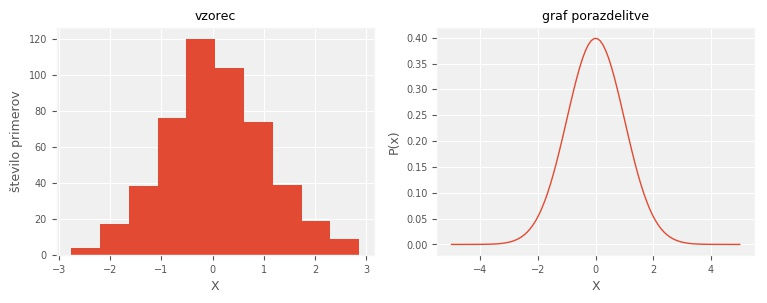

In [2]:
from scipy.stats import multivariate_normal as mvn 

# Parametri določajo obliko funkcije
mu     = 0   # sredina
sigma2 = 1   # varianca

n = 500  # velikost vzorca
sample = mvn.rvs(mu, sigma2, size=n)  # naključen vzorec n primerov

xr = np.linspace(-5, 5, 100)               # interval X 
P  = [mvn.pdf(x, mu, sigma2) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

### Učenje parametrov

V praksi resničnih vrednosti parametrov ne poznamo. *Parametrov se naučimo iz vzorca*. Prednosti postopka so, da nato lahko sklepamo o novih vzorcih, t.j., vsaki možni vrednosti spremenljivke priredimo verjetnost.

Imamo vzorec naključne spremenljivke $X$ velikosti $n$. 
$$ {X_1, X_2, ..., X_n} $$

Za normalno porazdelitev dobimo *oceno* za parametre na naslednji način:

$\mu = E[X_i] = \bar{X}$

$\sigma^2 = \frac{n-1}{n} E[(X_i-\bar{X})^2] = \frac{n-1}{n} var[x]$

Vrednost $\mu$ je povprečje vzorca. Vrednost $\sigma^2$ je popravljena varianca vzorca.

Ocenimo parametre iz vzorca:

In [3]:
mu_fit = np.mean(sample)
sigma2_fit = (n-1)/n * np.var(sample)

mu_fit, sigma2_fit

(0.06328467528028045, 0.96552119938533765)

Ocenjeni vrednosti parametrov sta podobni resničnim vrednostim ($\mu = 0$ , $\sigma^2 = 1$).

Na eni sliki primerjamo porazdelitev z naučenimi parametri s pravo porazdelitvijo:

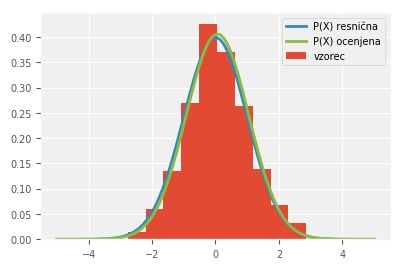

In [4]:
P_fit = [mvn.pdf(x, mu_fit, sigma2_fit) for x in xr]

plt.figure()
plt.hist(sample,    label="vzorec", normed=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)  
plt.legend();

##### Vprašanje 3-1-1

Preveri, kako se natančnost ocene parametrov spreminja z velikostjo vzorca $n$.

[Odgovor](http://localhost:8888/notebooks/rešitve_03-1_porazdelitve.ipynb#odgovor-3-1-1)

## Studentova porazdelitev

Studentova porazdelitev (ali t-porazdelitev) je porazdelitev na celotnem območju realnih števil. Njena oblika je simetrična in podobna normalni porazdelitvi. Je manj občutljiva na *osamelce v majhnih vzorcih*.


**Tip spremenljivke:** eno-dimenzionalna, zvezna.

**Definicijsko območje:** $x \in (-\infty, +\infty)$

**Oblika:**
    $$ P(x) = \frac{\Gamma[(\nu + 1) / 2]}{\sqrt{\nu \pi} \, \Gamma(\nu / 2)} \left( 1 + \frac{x^2}{\nu} \right)^{-(\nu + 1) / 2}$$

**Parametri:**
* $\nu$ število prostostnih stopenj

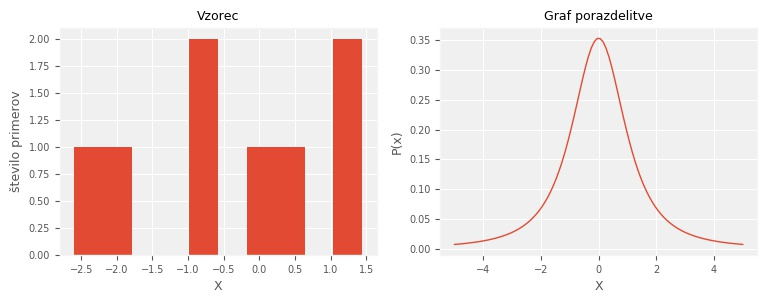

In [5]:
from scipy.stats import t as student 

# Parametri določajo obliko funkcije
nu = 2 # prostostne stopnje

n = 8  # velikost vzorca
sample = student.rvs(nu, size=n)  # naključen vzorec n primerov spremenljivke

xr = np.linspace(-5, 5, 100)  # interval X 
P  = [student.pdf(x, nu) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključlnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

### Učenje parametrov iz vzorca

Večina porazdelitve v knjižnici ```scipy``` vsebuje funkcijo ```fit```, ki izračuna najverjetnejše vrednosti parametrov porazdelitve glede na vzorec.

Na eni sliki primerjamo porazdelitev z naučenimi parametri s pravo porazdelitvijo

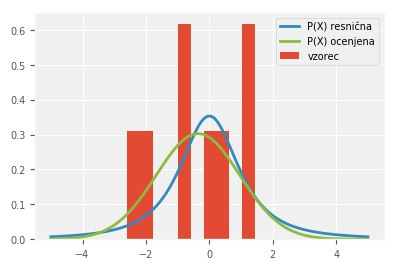

In [6]:
pars = student.fit(sample)
P_fit = [student.pdf(x, *pars) for x in xr ]

plt.figure()
plt.hist(sample,    label="vzorec", normed=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)
plt.legend();

##### Vprašanje 3-1-2

Generiraj vzorec z  manjhnim številom (do 20) vzorcev iz normalne porazdelitve. Primerjaj ocene porazdelitve s pomočjo normalne in Studentove porazdelitve. Katera porazdelitev bolje oceni resnično porazdelitev?

In [7]:
# Primerjaj Normalno in Studentovo porazdelitev pri majhnem vzorcu
# ...

[Odgovor](http://localhost:8888/notebooks/rešitve_03-1_porazdelitve.ipynb#odgovor-3-1-2)

## Porazdelitev Beta

Beta porazdelitev je porazdelitev spremnljivke na *omejenem intervalu* $[0, 1]$. Njena oblika je zelo prilagodljiva, lahko ima namreč en ali dva *maksimuma*. Porazdelitev lahko prevedemo na poljuben interval 
$[a, b]$ s seštevanjem (translacija) in množenjem (širjenje/ožanje) intervala.

**Tip spremenljivke:** $x$,enodimenzionalna, zvezna, na omejenem intervalu.

**Definicijsko območje:** $x \in [0, 1]$

**Oblika:**
    $$ P(x) = \frac{1}{\mathrm{B}(\alpha,\beta)}\, x ^{\alpha-1}(1-x)^{\beta-1}$$

**Parametri:**
* $a$
* $b$

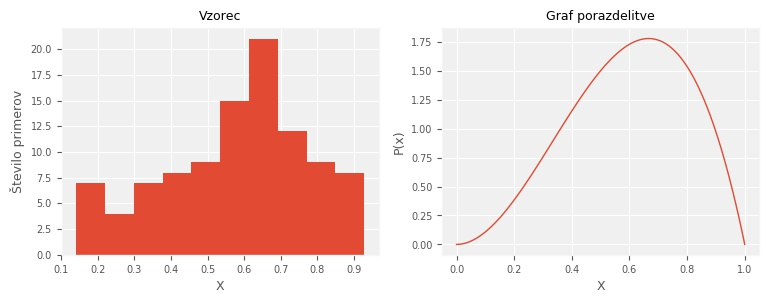

In [8]:
from scipy.stats import beta

# Parametri določajo obliko funkcije
a, b = (3, 2)    # parametra a, b

n = 100                            # velikost vzorca
sample = beta.rvs(a, b, size=n)        # naključen vzorec n primerov spremenljivke

xr = np.linspace(0, 1, 100)               # interval X 
P  = [beta.pdf(x, a, b) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključlnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("Vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("Število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("Graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

##### Vprašanje 3-1-3

Spreminjaj parametra $a$ in $b$. Kako se oblika funkcije spreminja?

[Odgovor](http://localhost:8888/notebooks/rešitve_03-1_porazdelitve.ipynb#odgovor-3-1-3)

### Učenje parametrov iz vzorca
Tudi za učenje parametrov porazelitve Beta uporabimo funkcijo ```fit```.

Na eni sliki primerjamo porazdelitev z naučenimi parametri s pravo porazdelitvijo.

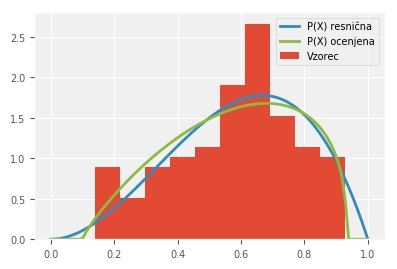

In [9]:
parameters = beta.fit(sample)
P_fit = [beta.pdf(x, *parameters) for x in xr ]

plt.figure()
plt.hist(sample,    label="Vzorec", normed=True)
plt.plot(xr, P,     label="P(X) resnična", linewidth=2.0)
plt.plot(xr, P_fit, label="P(X) ocenjena", linewidth=2.0)   # ocenjena porazdelitev je model
plt.legend();

##### Vprašanje 3-1-4

Spreminjaj parametra $a$ in $b$ ter velikost vzorca $n$. Kako se spreminja kakovost prileganja?

[Odgovor](http://localhost:8888/notebooks/rešitve_03-1_porazdelitve.ipynb#odgovor-3-1-4)